In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sympy import rotations


nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
import pandas.errors as pd_err


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kovre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kovre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
%store -r df_categories_stats
%store -r df_comment_by_category
%store -r df_comment_by_category_stats

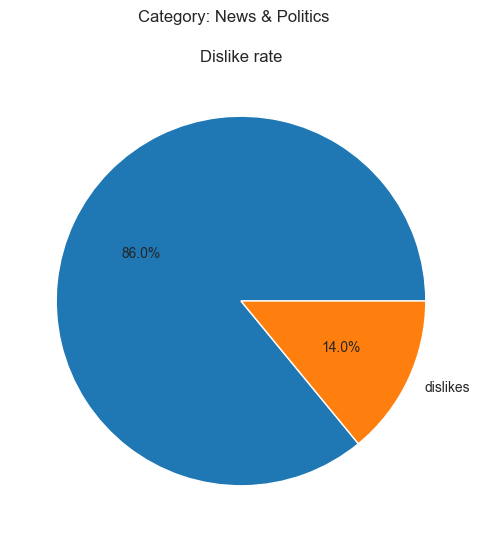

In [10]:
def dislike_rate_chart(name_category):
    try:
        data_local = df_categories_stats.loc[f'{name_category}']
        data_local = data_local['dislikes'] / data_local['total_reactions']
        data_local = round(data_local * 100, 2)
        sns.set_style('whitegrid')
        plt.figure(figsize=(6, 6))
        plt.pie((100, data_local), labels=['', 'dislikes'], autopct='%1.1f%%')
        plt.title('Dislike rate')
        plt.suptitle(f'Category: {name_category}')
        plt.show()
    except KeyError :
        return "Something went wrong! Please check if is given category name is valid."

dislike_rate_chart(input())

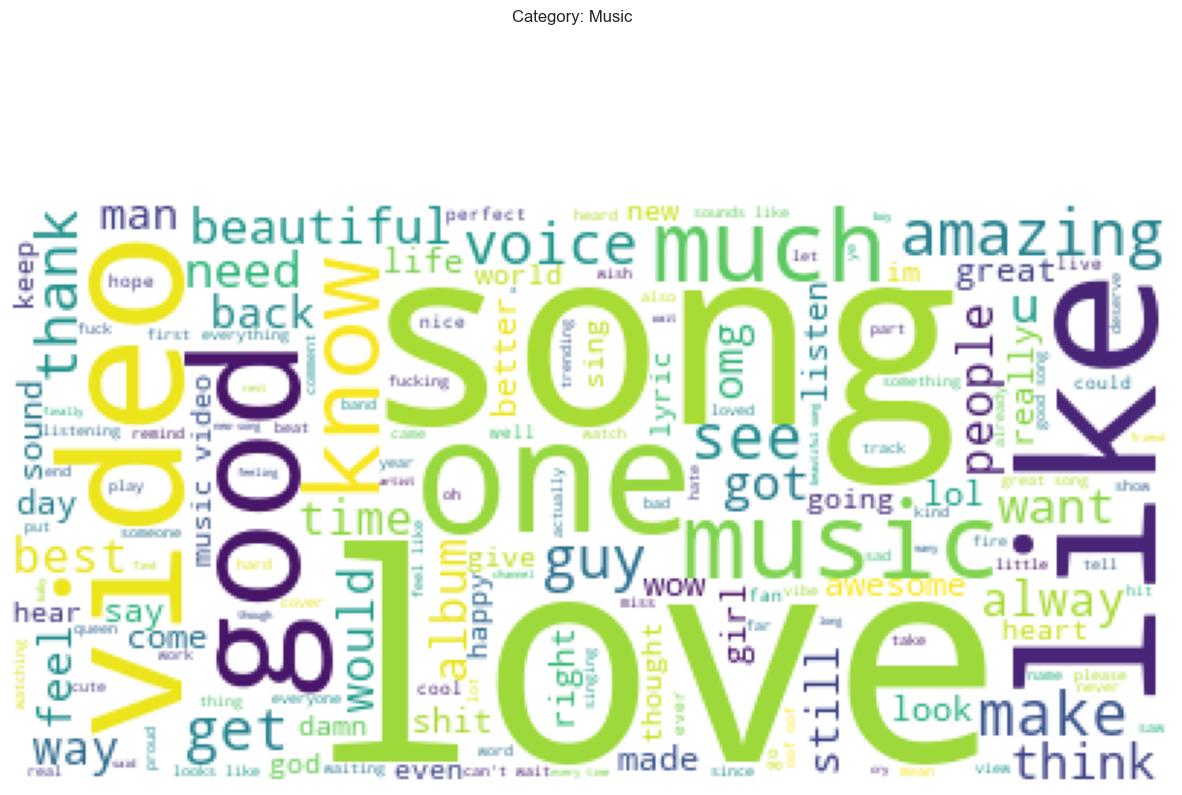

In [11]:
#Creating word clouds
def draw_wordcloud(name_category):
    try:
        negative_wordcloud = WordCloud(background_color="white", stopwords=set(stopwords.words('english'))).generate(df_comment_by_category.loc[f'{name_category}'])
        plt.figure(figsize=(15,10))
        plt.suptitle(f'Category: {name_category}')
        plt.axis('off')
        plt.imshow(negative_wordcloud)
        plt.show()
    except KeyError:
        return "Something went wrong! Please check if is given category name is valid."

draw_wordcloud(input())

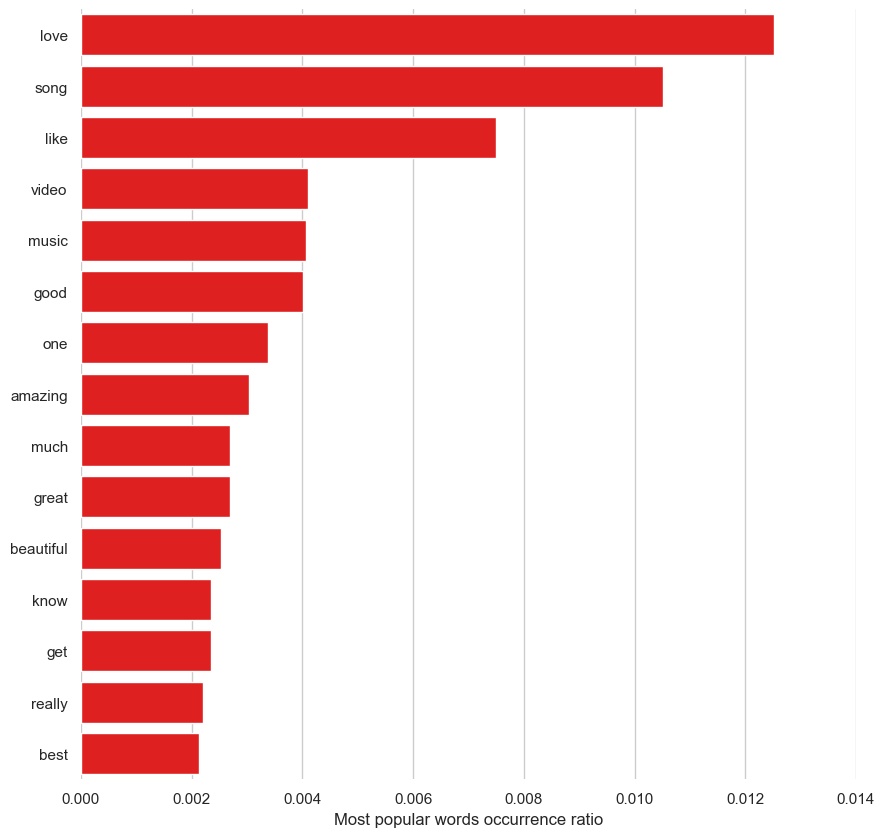

In [13]:
def word_usage(name_category):
    try:
        data_local = df_comment_by_category_stats.loc[f'{name_category}']
        data_local = dict([(n[0], n[1] / data_local['nb_words']) for n in data_local['top_words']])
        sns.set_theme(style='whitegrid')
        f, ax = plt.subplots(figsize=(10, 10))
        sns.barplot(data=data_local, x=data_local.values(), y=data_local.keys(), label='words', legend=False, color='red')
        ax.set(xlim=(0, 0.014), xlabel='Most popular words occurrence ratio')
        sns.despine(left=True, bottom=True)
        plt.show()
    except KeyError:
        return "Something went wrong! Please check if is given category name is valid."

word_usage(input())